# Introduction 
### In this data set I'm doing exploratory and explanatory data analysis 
### I'm asking alot of questions like :
### which days are our peak ride dayes ?
### which customer gender we have most ?
### do we have subscribers more or customers ?

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline 
sns.set()
from datetime import datetime as dt

In [2]:
data=pd.read_csv('201902-fordgobike-tripdata (1).csv')

# Exploratory Data Analysis

In [3]:
#displaying first 5 rows of the dataset
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


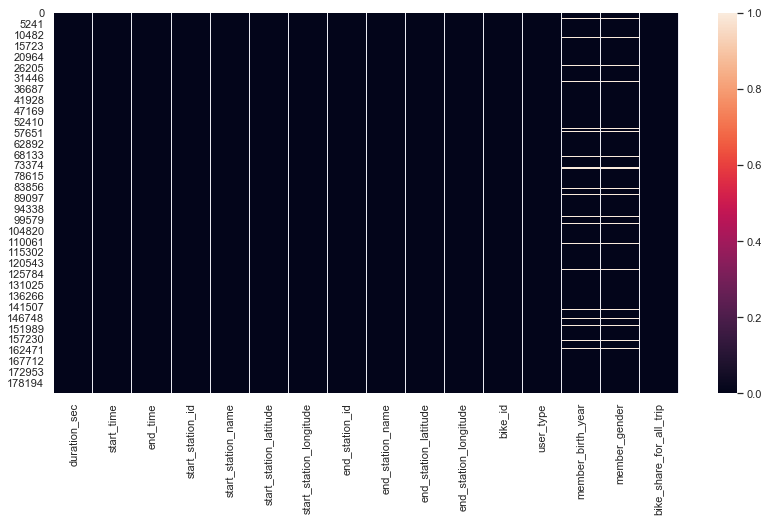

In [6]:
#using heatmap to define which columns contain nulls 
plt.figure(figsize=(14,7))
sns.heatmap(data.isnull())

In [7]:
#using numbers to gain more insights of the nulls 
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#number of rows and columns of our data 
data.shape

(183412, 16)

Text(0.5, 1.0, 'top start stations ids null values')

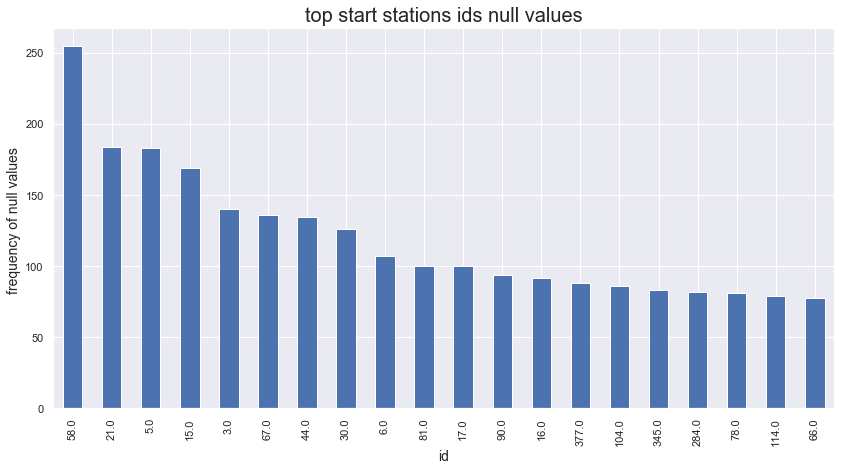

In [32]:
#what stations tend to have more nulls 
plt.figure(figsize=(14,7))
data[data.member_birth_year.isna()]['start_station_id'].value_counts().head(20).plot(kind='bar')
plt.xlabel('start station id',fontsize=14)
plt.ylabel('frequency of null values ',fontsize=14)
plt.title('top start stations ids null values',fontsize=20)

Text(0.5, 1.0, 'top end stations ids null values')

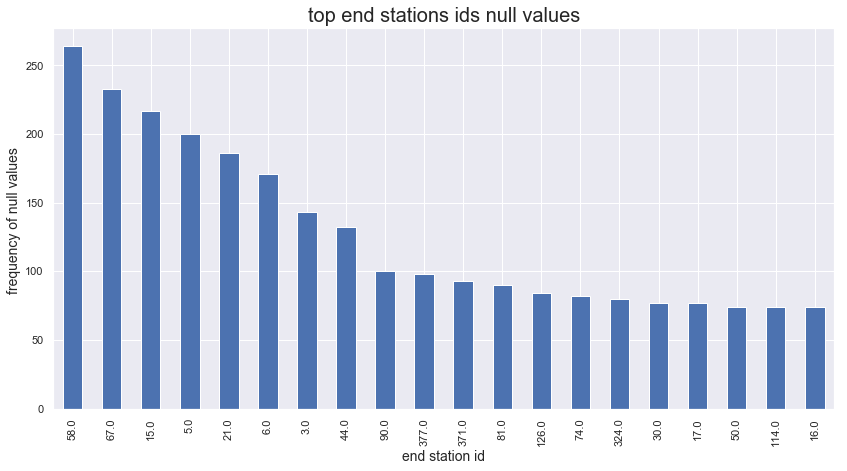

In [34]:
#what end stations tend to have the most nulls 
plt.figure(figsize=(14,7))
data[data.member_birth_year.isna()]['end_station_id'].value_counts().head(20).plot(kind='bar')
plt.xlabel('end station id',fontsize=14)
plt.ylabel('frequency of null values ',fontsize=14)
plt.title('top end stations ids null values',fontsize=20)

In [35]:
""" By comparison I see some ids are missing in both start station and end stations so there's a problem here we should solve """

" By comparison I see some ids are missing in both start station and end stations so there's a problem here we should solve "

In [39]:
#knowing the % of nulls 
data.member_gender.isnull().sum()/data.member_gender.shape[0]

0.04506248228033062

In [40]:
""" The null data percentage here in the member gender are only %5 of the total data , so I suggest to drop them as they're too low """

" The null data percentage here in the member gender are only %5 of the total data , so I suggest to drop them as they're too low "

In [44]:
#dropping null rows 
data.dropna(axis=0,inplace=True)

In [47]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


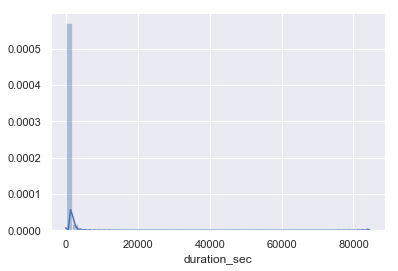

In [62]:
#searching for durations outlieres 
sns.distplot(data.duration_sec)

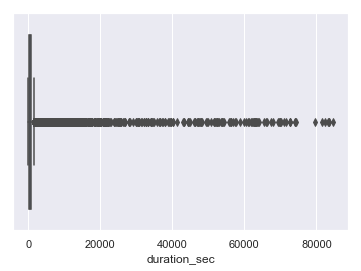

In [52]:
sns.boxplot(data.duration_sec)

In [ ]:
""" in the duration seconds column the data have too much outliers but we are keeping them due to EDA purpose"""

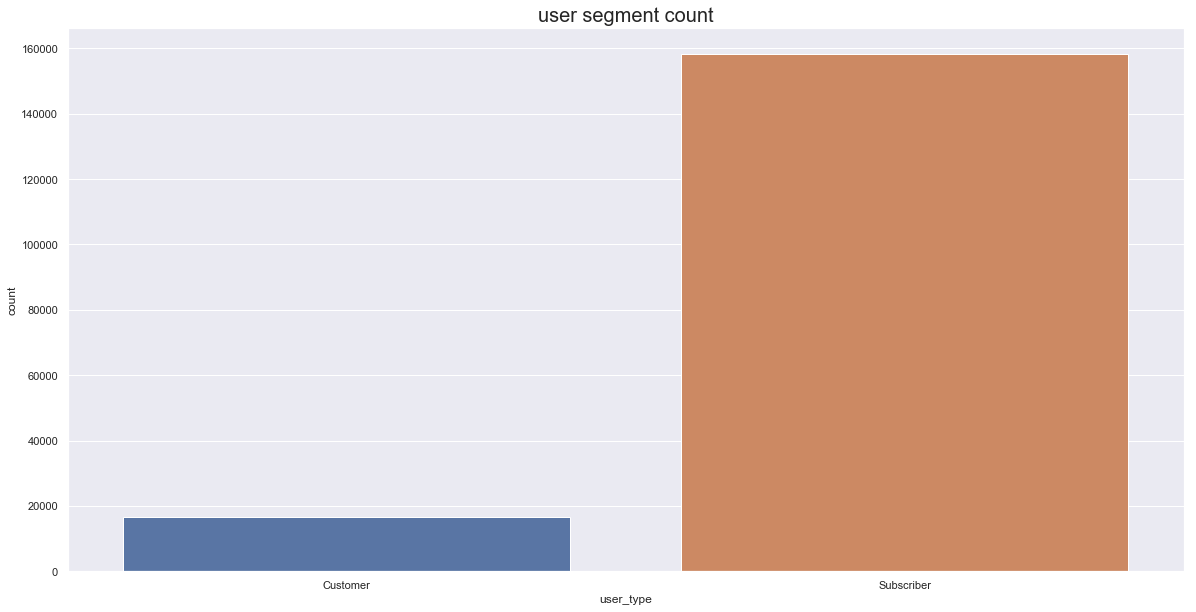

In [146]:
#which user type we have in our user base
plt.figure(figsize=(20,10))
sns.countplot(data.user_type)
plt.title('user segment count',fontsize=20)
plt.show()

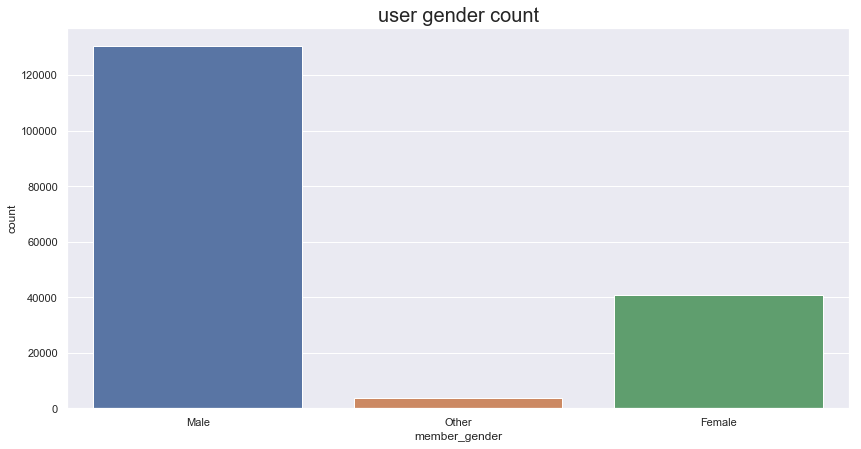

In [149]:
#which gender are our niche 
plt.figure(figsize=(14,7))
sns.countplot(data.member_gender)
plt.title('user gender count',fontsize=20)
plt.show()

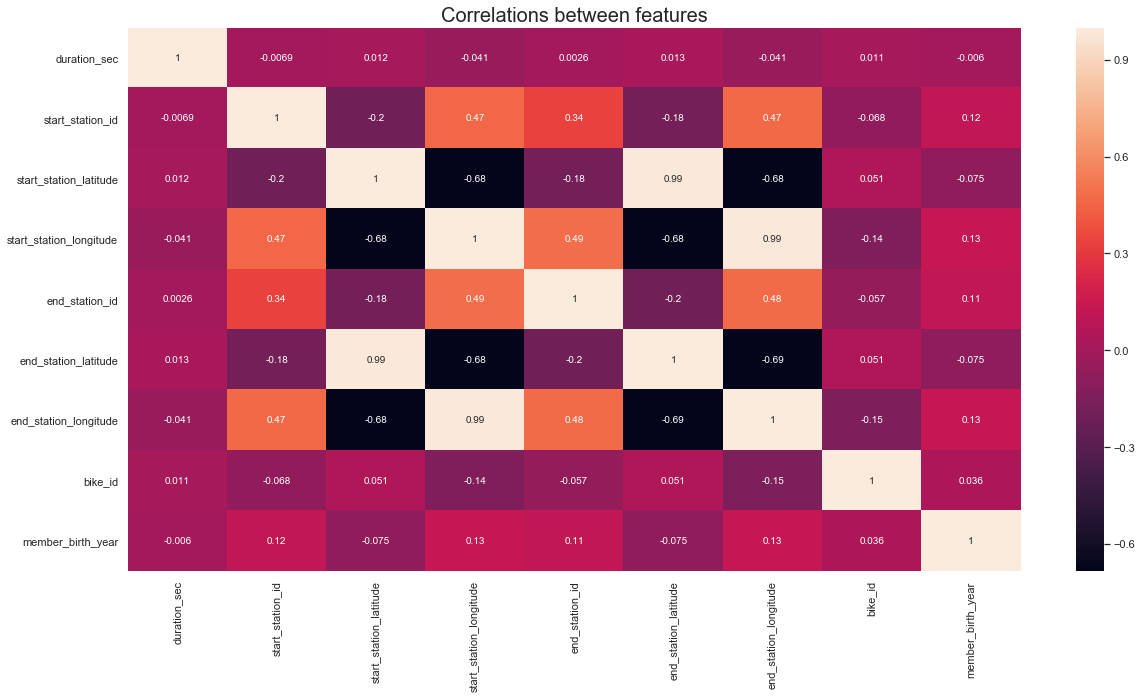

In [90]:
#finding correlations between variables 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlations between features',fontsize=20)
plt.show()

In [151]:
#columns data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
week_number                174952 non-null int64
month_day          

## Extracting columns from dates 

In [93]:
data['start_time']=pd.to_datetime(data['start_time'])

In [94]:
data['end_time']=pd.to_datetime(data['end_time'])

In [99]:
data['week_number']=data.start_time.dt.week

In [100]:
data['month_day']=data.start_time.dt.day

In [101]:
data['month']=data.start_time.dt.month

In [102]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_number,month_day,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,9,28,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,9,28,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,9,28,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,9,28,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,9,28,2


# Explanatory Data Analysis

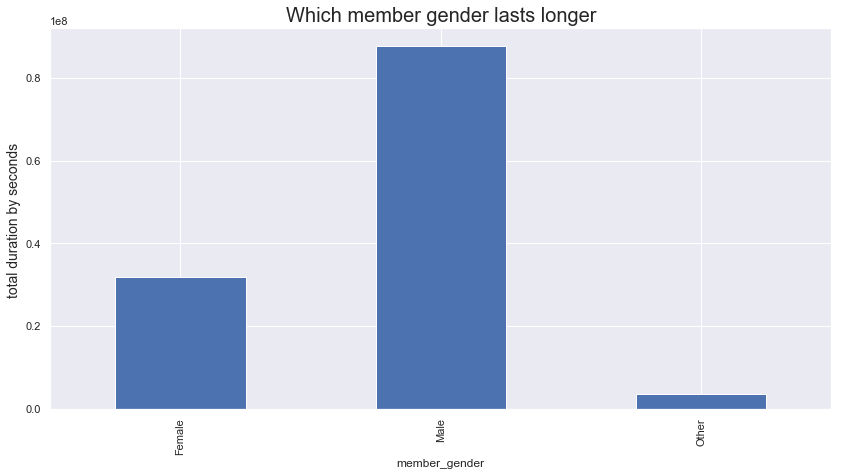

In [75]:
plt.figure(figsize=(14,7))
data.groupby('member_gender')['duration_sec'].sum().plot(kind='bar')
plt.ylabel('total duration by seconds ',fontsize=14)
plt.title('Which member gender lasts longer',fontsize=20)
plt.show()

In [145]:
""" Males have total time duartions by far , but this is due to that our most of our customers are males """

' Males have total time duartions by far , but this is due to that our most of our customers are males '

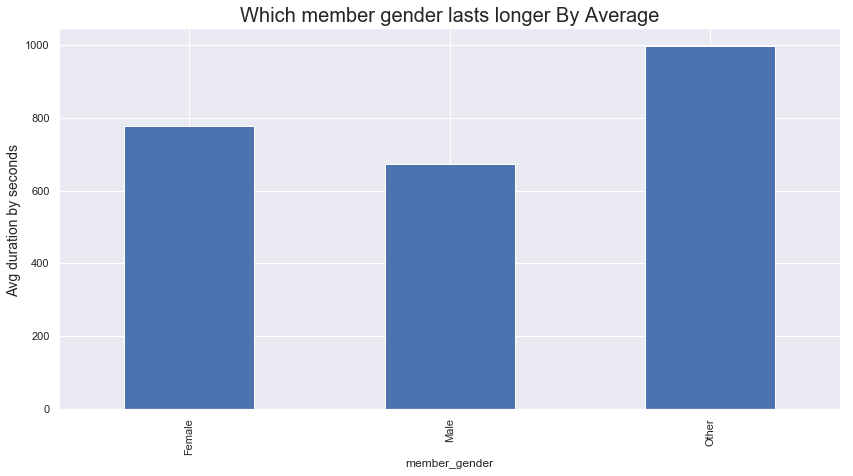

In [76]:
plt.figure(figsize=(14,7))
data.groupby('member_gender')['duration_sec'].mean().plot(kind='bar')
plt.ylabel('Avg duration by seconds ',fontsize=14)
plt.title('Which member gender lasts longer By Average',fontsize=20)
plt.show()

In [ ]:
""" others & Females tend to last longer in durations by avg """

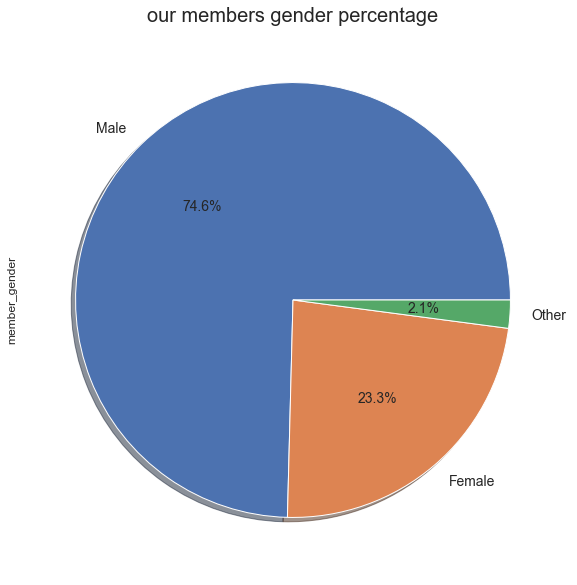

In [85]:
plt.figure(figsize=(20,10))
data.member_gender.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',shadow=True,fontsize=14)
plt.title('our members gender percentage',fontsize=20)
plt.show()

In [88]:
""" Although men are our most customers , but females on Average tend to last longer in trip durations"""

' Although men are our most customers , but females on Average tend to last longer in trip durations'

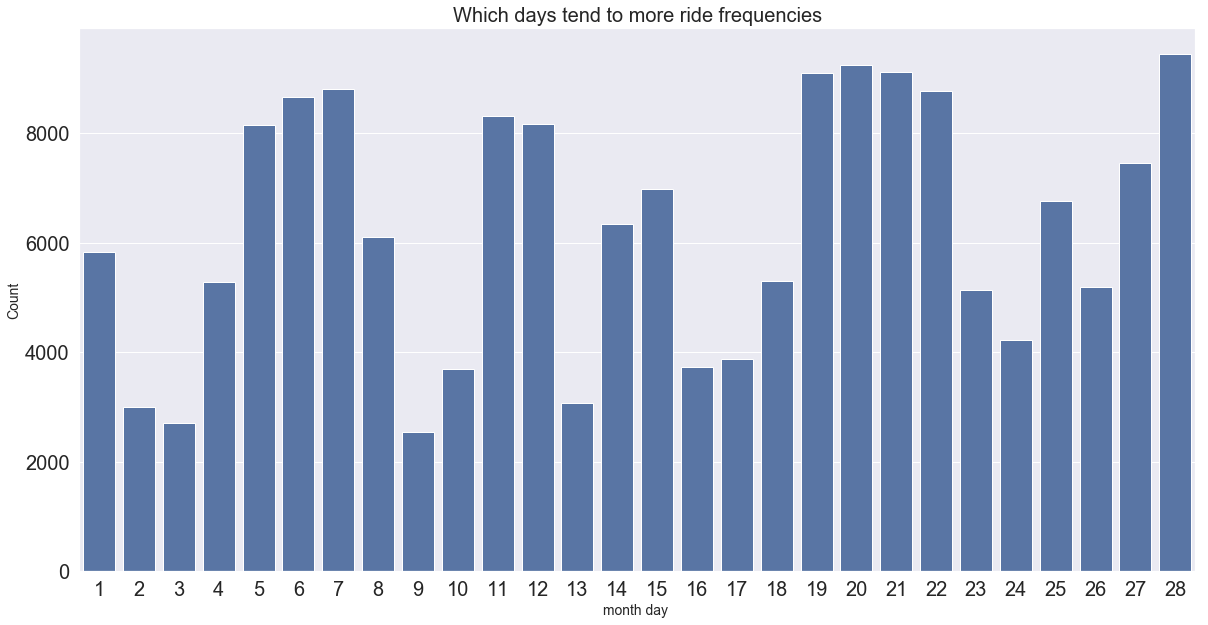

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='month_day',color=sns.color_palette()[0])
plt.xticks(size='20')
plt.yticks(size='20')
plt.xlabel('month day ',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Which days tend to more ride frequencies',fontsize=20)
plt.show()

In [144]:
""" there are specific days of the month tend to have more ride numbers other than the rest of the days """

' there are specific days of the month tend to have more ride numbers other than the rest of the days '

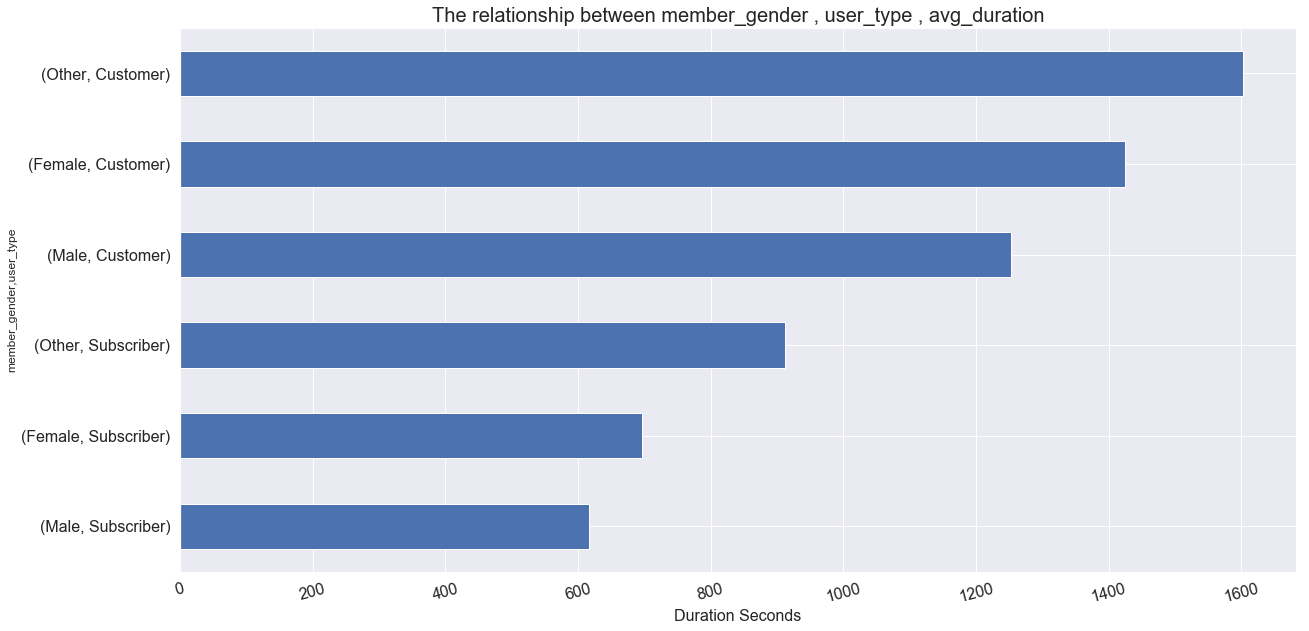

In [141]:
plt.figure(figsize=(20,10))
data.groupby(['member_gender','user_type'])['duration_sec'].mean().sort_values().plot(kind='barh')
plt.xticks(rotation=15,fontsize=16)
plt.yticks(fontsize=16)
plt.title('The relationship between member_gender , user_type , avg_duration',fontsize=20)
plt.xlabel('Duration Seconds',fontsize=16)
plt.show()

In [ ]:
""" customers tend to last longer in duration trips other than subscribers"""

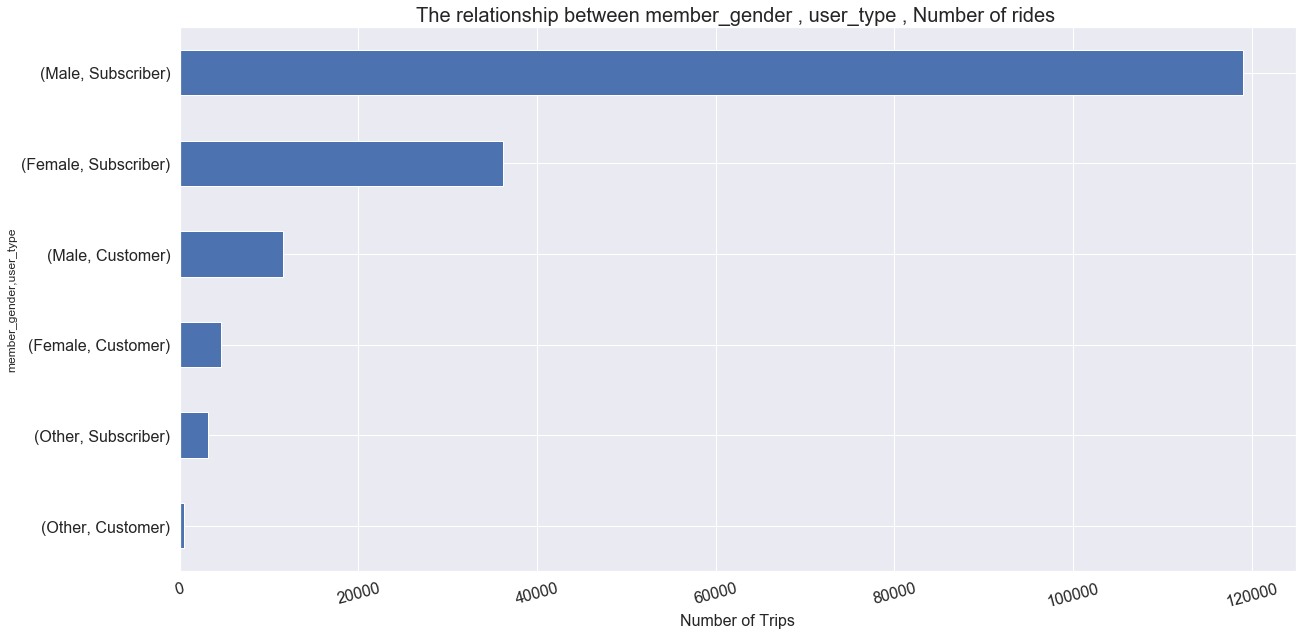

In [140]:
plt.figure(figsize=(20,10))
data.groupby(['member_gender','user_type'])['duration_sec'].count().sort_values().plot(kind='barh')
plt.xticks(rotation=15,fontsize=16)
plt.yticks(fontsize=16)
plt.title('The relationship between member_gender , user_type , Number of rides ',fontsize=20)
plt.xlabel('Number of Trips',fontsize=16)
plt.show()

In [143]:
"""Male Subscribers are our niche customers by far , Then Female subscribers"""

'Male Subscribers are our niche customers by far , Then Female subscribers'

# Limitations : 
### There were about 8000 null values in the data , I choosed to delete them 
### there were many more outliers but I kept them due to the EDA purpose 

# Summary :
### Males are our niche customers 
### Females tend to last longer in every trip 
### customers tend to last longer in every trip 
### subscribers trips counts are high by far 

In [5]:
!jupyter nbconvert udacity_project_gobike_eda.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook udacity_project_gobike_eda.ipynb to slides
[NbConvertApp] Writing 730559 bytes to udacity_project_gobike_eda.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\20115\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\20115\Anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\20115\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\20115\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "C:\Users\20115\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_fi